MOONS 데이터셋에서 다음 방법으로 분류해볼 것 
1. RBF, gamma=5, C=0.1
2. RBF, gamma=0.5, C=0.1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score

def nameof(obj):
    """입력받은 변수의 이름을 반환하는 함수."""
    for name in  globals() :
        if(globals()[name] is obj) : return name

def accuracy(clf):
    """accuracy_sore를 print하는 함수"""
    clf.fit(X_train, y_train )
    y_pred = clf.predict(X_test)
    print(nameof(clf),":",accuracy_score(y_test, y_pred)) 

    
# 데이터셋 만들기
X, y = make_moons(n_samples=500, noise=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=42)

# 조건1
svm_clf1=SVC(kernel="rbf",gamma=5,C=0.1, random_state=42)
accuracy(svm_clf1)

# 조건2
svm_clf2=SVC(kernel="rbf",gamma=0.5,C=0.1, random_state=42)
accuracy(svm_clf2)

svm_clf1 : 0.976
svm_clf2 : 0.888


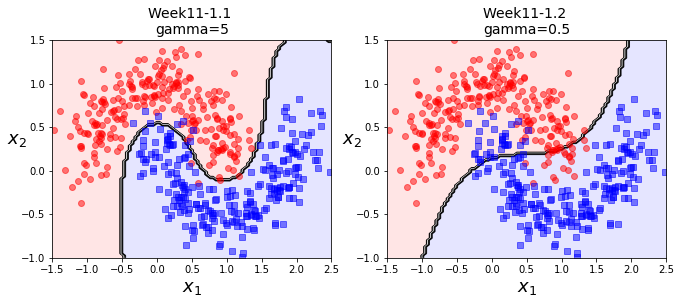

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5,2.5,-1,1.5], alpha=0.5, contour=True,title=None):
    width = np.linspace(axes[0], axes[1], 100)
    height = np.linspace(axes[2], axes[3], 100)
    
    x1, x2 = np.meshgrid(width, height)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    custom_cmap = ListedColormap(['#ffaaaa','#aaaaff'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#000000','#ffffff','#000000'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
        
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if title : plt.title(title,fontsize=14)


# 데이터 그리기
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_decision_boundary(svm_clf1, X, y, title='Week11-1.1 \ngamma=5')

plt.subplot(122)
plot_decision_boundary(svm_clf2, X, y, title='Week11-1.2 \ngamma=0.5')

plt.show()

iris 데이터 셋에서 20%는 테스트셋으로 따로 두고 다음과 같은 SVM 분류기로 훈련셋트에서 훈련시킨 후 테스트해보세요.
(Cross Validation 사용하고 Sepal length와 Sepal width만 사용)

RBF 커널을 이용하고 gamma =0.7 , C= 1 일 때
옵션 kernel=‘linear’ 이용하고 C=1 일 때
옵션 kernel=‘poly’ 이용하고 degree=3, gamma=‘auto’, C=1

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

# 변수의 이름을 반환하는 함수
def nameof(obj):
    for name in  globals() :
        if(globals()[name] is obj) : return name

# clf의 정확도를 print해주는 함수            
def accuracy(clf):
    clf.fit(X_train, y_train )
    y_pred = clf.predict(X_test)
    print(nameof(clf),":",accuracy_score(y_test, y_pred)) 
    
# 데이터 불러오기
iris = load_iris()
X,y  = iris.data[:,2:], iris.target

# 실습 조건
svm_clf1 = SVC(kernel="rbf",gamma=0.7,C=1, random_state=42)
svm_clf2 = SVC(kernel="linear",C=1, random_state=42)
svm_clf3 = SVC(kernel="poly",degree=3 ,gamma="auto",C=1, random_state=42)

# 정확도 측정, 반복되는 코드 축약
for i in range(1,4):
    exec(f"y_pred{i}=cross_val_predict(svm_clf{i},X,y,cv=3);")
    exec(f"accuracy(svm_clf{i}); print(confusion_matrix(y,y_pred{i}))")
    print()

# y_pred1=cross_val_predict(svm_clf1,X,y,cv=3)
# y_pred2=cross_val_predict(svm_clf2,X,y,cv=3)
# y_pred3=cross_val_predict(svm_clf3,X,y,cv=3)

# accuracy(svm_clf1)
# accuracy(svm_clf2)
# accuracy(svm_clf3)

# print(confusion_matrix(y,y_pred1))
# print(confusion_matrix(y,y_pred2))
# print(confusion_matrix(y,y_pred3))

svm_clf1 : 0.968
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]

svm_clf2 : 0.856
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]

svm_clf3 : 0.832
[[50  0  0]
 [ 0 48  2]
 [ 0  4 46]]



mnist 데이터셋에서 SVC로 분류해보기


In [ ]:
from sklearn.datasets import fetch_openml

# 초기화
mnist = fetch_openml('mnist_784')
X,y = mnist["data"],mnist["target"].astype(np.int)

# 학습 데이터, 테스트 데이터 나누기
X_train,X_test,y_train,y_test=X[:30000],X[50000:],y[:30000],y[50000:]

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
lin_svc = LinearSVC(random_state=42)
lin_svc.fit(X_train, y_train)
print(accuracy_score(y_test, lin_svc.predict(X_test)))

0.8323


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
svmclf1= SVC(kernel='rbf', C=1.0, gamma=0.01)
svmclf1.fit(X_train, y_train)
print(accuracy_score(y_test, svmclf1.predict(X_test)))
#매개변수를 찾고 싶었으나 시간이 많이 걸려 못함.

KeyboardInterrupt: ignored

사이킷런의 load_breast_cancer()로 데이터 불러오고 SGDClassifier와 SVC 분류기 만들기

In [ ]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size =0.3, random_state=42)

In [ ]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9649122807017544

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier()
sgd_clf.fit(X_train, y_train)
y_pred1 = sgd_clf.predict(X_test)
accuracy_score(y_test, y_pred1)

0.8888888888888888